In [7]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as pw
import cogms
# %pip install git+https://gitee.com/epool/cogms.git

In [8]:
from utils_pydmc import Ob

def reformat_df(df, subj_col="subj_idx", rt_col="rt", response_col="response", congruency_col="congruency"):
        df = df.rename(
            columns={
                subj_col: "Subject",
                rt_col: "RT",
                response_col: "Error",
                congruency_col: "Comp"
            }
        )
        df["RT"] = abs(df["RT"]) * 1000  # milisecond to second
        df["Error"] = np.where(df["Error"] == 1, 0, 1)
        df["Comp"] = np.where(df["Comp"] == 1, "comp", "incomp")

        return df

In [13]:
df_match = {"a": 1.5, "v": 2, "t": 0.23, "z": 0.3, "sv": 0, "st": 0, "sz": 0}
thetas = np.array(list(df_match.values()))
cogms.DDM_trial(thetas)

cogms.experimenti_simulator()

(0.842,
 1.0,
 [2.0],
 [0.44999999999999996,
  0.44058818468849825,
  0.46343158112630606,
  0.47527132885080337,
  0.5028769013131438,
  0.5018170274206311,
  0.5130749588686377,
  0.4545430977869405,
  0.4208716311495271,
  0.44275943183019456,
  0.45122303917775264,
  0.41996037544726184,
  0.463291349380963,
  0.4624624450587567,
  0.4829468710163809,
  0.47615886523479356,
  0.4750587501077703,
  0.4383754944246118,
  0.4463901977508623,
  0.4488670532669076,
  0.437696715309869,
  0.40351698263191976,
  0.4128737780544889,
  0.38892278027883387,
  0.3476255944985686,
  0.4199898416907931,
  0.4383161254896619,
  0.4419984471327397,
  0.45560567648168465,
  0.48435193715277053,
  0.4521043478194134,
  0.46659181067673045,
  0.43020029512150865,
  0.3938570047070812,
  0.38992389730215826,
  0.373282240168631,
  0.4239279693354966,
  0.4402647312806131,
  0.41159413674461426,
  0.43298099742952034,
  0.4202769720224235,
  0.45425017609526747,
  0.4439214111819278,
  0.4832322166472

In [ ]:
df_match = {"v": 2, "a": 1.5, "t": 0.23, "sv": 0, "z": 0.3, "sz": 0, "st": 0}
df_nonmatch = {"v": 1, "a": 1.5, "t": 0.23, "sv": 0, "z": 0.5, "sz": 0, "st": 0}

# combine dataframe
data, params = hddm.generate.gen_rand_data(
    {
        "match": df_match,
        "nonmatch": df_nonmatch
    },
    size=500,
    subjs=50,
)

data["congruency"] = np.where(data["condition"] == "match", 1 , 0)
data = reformat_df(data)
data_plot = Ob(data)
# data_plot.plot.delta(ax=axes[2], show=False)

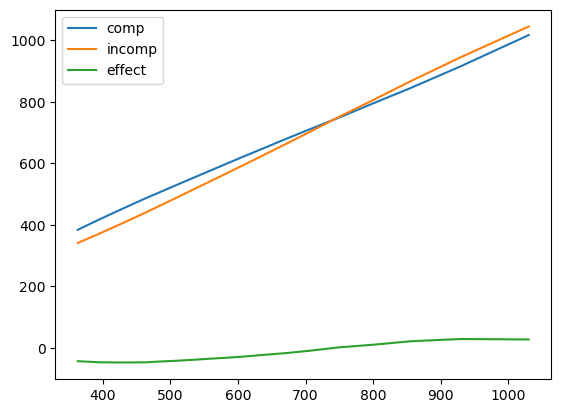

In [ ]:
data_plot.delta_subject

plt.plot(data_plot.delta["mean_bin"], data_plot.delta["mean_comp"], label="comp")
plt.plot(data_plot.delta["mean_bin"], data_plot.delta["mean_incomp"], label="incomp")
# plt.plot(data_plot.delta["mean_bin"], data_plot.delta["mean_incomp"]-data_plot.delta["mean_comp"], label="effect2")
plt.plot(data_plot.delta["mean_bin"], data_plot.delta["mean_effect"], label="effect")

plt.legend()
plt.show()

## FSE

In [2]:
def sim_FSE(match={}, nonmatch={}, trials_per_level=20000):
    # simulated data
    n_subjects = 1

    # only consider the stimulus effect on z
    df_match = {"v": 2, "a": 1.5, "t": 0.23, "sv": 0, "z": 0.3, "sz": 0, "st": 0}
    df_match.update(match)
    df_nonmatch = {"v": 1, "a": 1.5, "t": 0.23, "sv": 0, "z": 0.5, "sz": 0, "st": 0}
    df_nonmatch.update(nonmatch)

    # combine dataframe
    data, params = hddm.generate.gen_rand_data(
        {
            "match": df_match,
            "nonmatch": df_nonmatch
        },
        size=trials_per_level,
        subjs=n_subjects,
    )
    # data

    fig, axes = plt.subplots(1, 3, figsize=(7, 3))

    sns.barplot(x='condition', y='response', hue="condition", data=data, ax=axes[0])
    axes[0].set_ylim(0.8,1)
    sns.barplot(x='condition', y='rt', hue="condition", data=data, ax=axes[1])
    axes[1].set_ylim(0.3,1)
    
    data["congruency"] = np.where(data["condition"] == "match", 1 , 0)
    data = reformat_df(data)
    data_plot = Ob(data)
    data_plot.plot.delta(ax=axes[2], show=False)

    plt.tight_layout()
    plt.show()


def plot(a_match, v_match, z_match, a_nonmatch, v_nonmatch, z_nonmatch):
    sim_FSE(
        {
            "a": a_match,
            "v": v_match,
            "z": z_match
        }, {
            "a": a_nonmatch,
            "v": v_nonmatch,
            "z": z_nonmatch
        }
    )


pw.interact(
    plot,
    a_match=(0.3, 3, 0.1),
    v_match=(0, 5, 0.1),
    z_match=(0.2,0.8,0.02),
    a_nonmatch=(0.3, 3, 0.1),
    v_nonmatch=(0,5,0.1),
    z_nonmatch=(0.2,0.8,0.02)
)

interactive(children=(FloatSlider(value=1.6, description='a_match', max=3.0, min=0.3), FloatSlider(value=2.0, …

<function __main__.plot(a_match, v_match, z_match, a_nonmatch, v_nonmatch, z_nonmatch)>

## SPE

In [6]:
# simulated data
n_subjects = 1
trials_per_level = 200
a = 1.5
v_self = 1.1
v_friend = 1
v_other = 1
t = 0.4
z = 0.5
z_match = 0.6
z_mismatch = 0.4

# only consider the stimulus effect on z
df_match_self = {
    "v": v_self,
    "a": a,
    "t": t,
    "sv": 0,
    "z": z_match,
    "sz": 0,
    "st": 0
}
df_match_friend = {"v": v_friend, "a": a, "t": t, "sv": 0, "z": z, "sz": 0, "st": 0}
df_match_other = {
    "v": v_other,
    "a": a,
    "t": t,
    "sv": 0,
    "z": z_mismatch,
    "sz": 0,
    "st": 0
}
df_mismatch_self = {
    "v": v_self,
    "a": a,
    "t": t,
    "sv": 0,
    "z": (1 - z_match),
    "sz": 0,
    "st": 0
}
df_mismatch_friend = {
    "v": v_friend,
    "a": a,
    "t": t,
    "sv": 0,
    "z": z,
    "sz": 0,
    "st": 0
}
df_mismatch_other = {
    "v": v_other,
    "a": a,
    "t": t,
    "sv": 0,
    "z": (1 - z_mismatch),
    "sz": 0,
    "st": 0
}

# combine dataframe
data, params = hddm.generate.gen_rand_data(
    {
        "match_self": df_match_self,
        "match_friend": df_match_friend,
        "match_other": df_match_friend,
        "mismatch_self": df_mismatch_self,
        "mismatch_friend": df_mismatch_friend,
        "mismatch_other": df_mismatch_friend,
        "mismatch_self": df_mismatch_self,
        "mismatch_friend": df_mismatch_friend,
        "mismatch_other": df_mismatch_friend,
    },
    size=trials_per_level,
    subjs=n_subjects,
)

data[['matchness', 'label']] = data['condition'].str.split('_', expand=True)
data.head()

,rt,response,subj_idx,condition,matchness,label
0,0.529,1.0,0,match_self,match,self
1,0.601,1.0,0,match_self,match,self
2,0.869,1.0,0,match_self,match,self
3,0.526,1.0,0,match_self,match,self
4,0.794,1.0,0,match_self,match,self


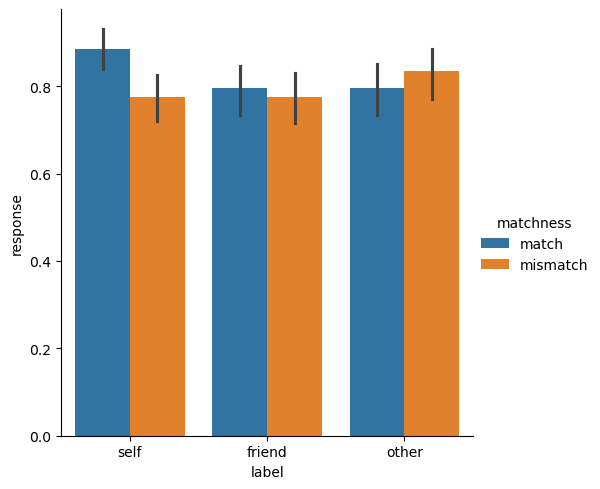

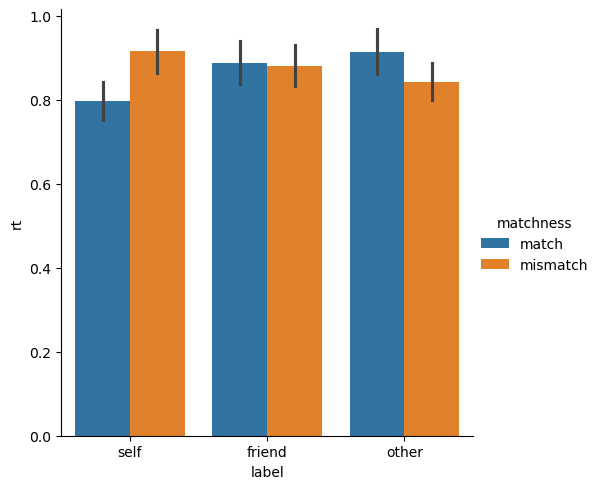

In [7]:
# sns.catplot(x='matchness', y='response', hue="label", data=data, kind="bar")
# sns.catplot(x='matchness', y='rt', hue="label", data=data, kind="bar")
sns.catplot(x='label', y='response', hue="matchness", data=data, kind="bar")
sns.catplot(x='label', y='rt', hue="matchness", data=data, kind="bar")

plt.show()

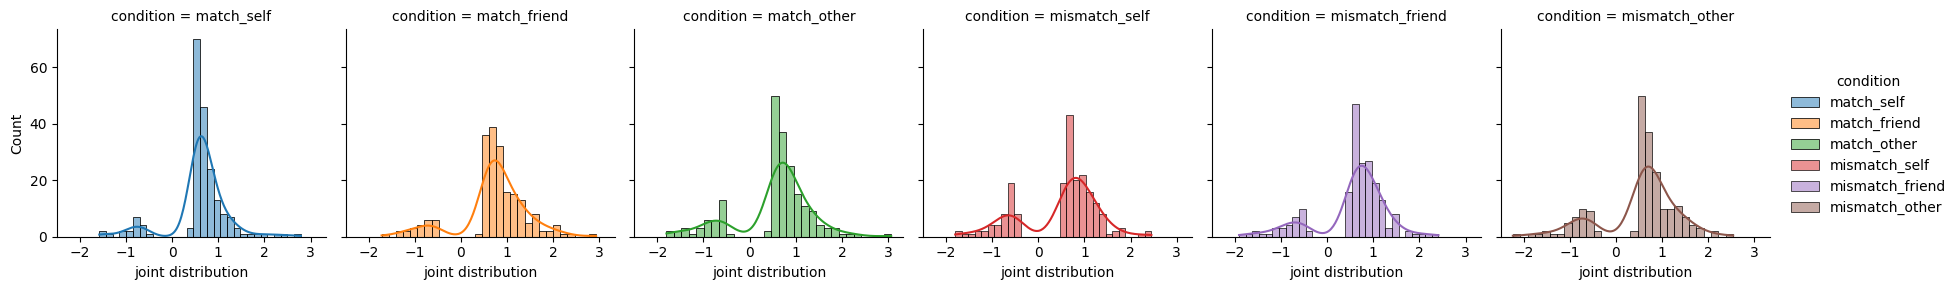

In [8]:
# Second chart: Histogram of the product of reaction time (rt) and response
data['joint distribution'] = data['rt'] * (2 * data['response'].astype(int) - 1)
# Use Seaborn's FacetGrid to create a multi-panel histogram
g = sns.FacetGrid(data, col="condition", hue="condition")
g.map(sns.histplot, "joint distribution", kde=True, bins=30)
g.add_legend()
plt.show()

## Basic model

To establish a baseline for comparison, we first constructed a basic model incorporating four fundamental parameters, devoid of any condition-specific influences. 

The mathematical expression of this model is as follows:

$$
\begin{align*}
rt,choice=1&\sim \text{WFPT}(v,a,t,z) \\
rt,choice=0&\sim \text{WFPT}(-v,a,t,1-z) \\
\end{align*}
$$

In [24]:
m0 = hddm.HDDM(data, include=['v', 'a', 't', 'z'])
m0_infdata = m0.sample(2000,
                       burn=1000,
                       chains=4,
                       return_infdata=True,
                       save_name="m0")

No model attribute --> setting up standard HDDM
Set model to ddm
hddm sampling elpased time:  18.57 s
Start converting to InferenceData...


## Accuracy Coding model

In the second model, we introduce a condition-specific parameter, denoted as `stimulus`. We refer to this model as the accuracy coding model since its response variable is accuracy in relation to the choice or stimulus, as will be further elaborated in subsequent models.

Establishing this model is significant as it allows us to conduct parameter recovery analyses. By comparing the fit parameters with the true parameters, we can assess the model’s ability to accurately estimate the underlying decision-making processes. This evaluation is crucial for validating the model’s fidelity and its applicability in various experimental contexts.

In [9]:
m1_acc = hddm.HDDM(data,
                   depends_on={
                       'a': 'condition',
                       'v': 'condition',
                       't': 'condition',
                       'z': 'condition'
                   },
                   include=['v', 'a', 't', 'z'])
m1_acc_infdata = m1_acc.sample(2000,
                               burn=1000,
                               chains=4,
                               return_infdata=True,
                               save_name="m1_acc")

No model attribute --> setting up standard HDDM
Set model to ddm
hddm sampling elpased time:  31.884 s
Start converting to InferenceData...


In [10]:
az.summary(m1_acc_infdata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a(match_friend),1.708,0.077,1.569,1.862,0.002,0.002,1308.0,1761.0,1.01
a(match_other),1.479,0.061,1.374,1.597,0.002,0.001,1485.0,1990.0,1.00
a(match_self),1.413,0.067,1.301,1.548,0.002,0.001,1486.0,1865.0,1.00
a(mismatch_friend),1.510,0.063,1.398,1.633,0.002,0.001,1457.0,2056.0,1.00
a(mismatch_other),1.470,0.059,1.367,1.587,0.001,0.001,1706.0,2177.0,1.00
a(mismatch_self),1.481,0.055,1.379,1.585,0.001,0.001,1850.0,2165.0,1.00
v(match_friend),1.252,0.134,1.012,1.506,0.004,0.003,1270.0,2210.0,1.00
v(match_other),0.984,0.139,0.715,1.236,0.004,0.003,1421.0,1895.0,1.00
v(match_self),1.255,0.177,0.936,1.597,0.006,0.004,873.0,1695.0,1.01
v(mismatch_friend),1.227,0.144,0.951,1.488,0.004,0.003,1612.0,2422.0,1.00


## Start point z and Stim Coding Type1


In our simulated data, since the values of all parameters except the z are the same for both conditions. 

Therefore. We can simplify the two previous models, `m1_acc` and `m1_choice`, i.e., consider only the parameter z changing with the stimulus, while keeping the other parameters constant, corresponding to `m2_acc` and `m2_choice`.

> In practical modelling, we also recommend that you build a full model (with all parameters and experimental manipulations) first, and then merge those unnecessary parameters and experimental manipulations to simplify the model.

`m2_acc` is very close to the previous results of `m1_acc` and will not be repeated here.

In [11]:
# using accuracy coding
m2 = hddm.HDDM(data, depends_on={'z': 'condition'}, include=['v', 'a', 't', 'z'])
m2_infdata = m2.sample(2000,
                       burn=1000,
                       chains=4,
                       return_infdata=True,
                       save_name="m2_z_condition")

No model attribute --> setting up standard HDDM
Set model to ddm
hddm sampling elpased time:  29.417 s
Start converting to InferenceData...


In [12]:
az.summary(m2_infdata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.498,0.024,1.455,1.546,0.001,0.000,1544.0,2231.0,1.0
v,1.121,0.058,1.006,1.226,0.002,0.001,1489.0,1966.0,1.0
t,0.404,0.004,0.396,0.412,0.000,0.000,1343.0,2025.0,1.0
z(match_friend),0.498,0.022,0.455,0.539,0.000,0.000,2735.0,2513.0,1.0
z(match_other),0.498,0.021,0.460,0.538,0.000,0.000,2752.0,2857.0,1.0
z(match_self),0.611,0.019,0.573,0.643,0.000,0.000,2141.0,2513.0,1.0
z(mismatch_friend),0.476,0.021,0.437,0.515,0.000,0.000,2917.0,2466.0,1.0
z(mismatch_other),0.496,0.021,0.456,0.534,0.000,0.000,2497.0,2381.0,1.0
z(mismatch_self),0.385,0.020,0.348,0.422,0.000,0.000,2782.0,2683.0,1.0


### Stim Coding in HDDMRegressor

In HDDM, an alternative approach to implementing stim coding is through the use of HDDMRegressor. Unlike HDDMStimCoding, HDDMRegressor allows users to apply stim coding to any parameter within a regression model, offering greater flexibility in model specification. However, this also requires users to have a deeper understanding of the model and its coding intricacies.
- We define our regression model `reg` as a dictionary that specifies the relationship between the starting point parameter z and the stimulus. 
- The model is defined as “z ~ 1”, indicating that the starting point is a function of the intercept, and the link_func is set to `z_link_func`, which is a custom function we’ve created to implement the stim coding.

In [16]:
data

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['match', 'mismatch'], dtype='object'))

In [21]:
def z_link_func(x, data=data, sim="matchness"):
  # 1 is mismatch; 0 is match
  stim = pd.factorize(data[sim].loc[x.index])[0]
  z_flip = (stim * (1 - x)) + x * (1 - stim)

  return z_flip


reg = [{
    "model": "v ~ 1 + C(label)",
    "link_func": lambda x: x
}, {
    "model": "z ~ 1 + C(label)",
    "link_func": z_link_func
}]

m3_stim = hddm.HDDMRegressor(
    data,
    reg,
    include=['v', 'a', 't', 'z'],
)
m3_stim_infdata = m3_stim.sample(2000,
                                 burn=1000,
                                 chains=4,
                                 return_infdata=True,
                                 save_name="m3_stim")

No model attribute --> setting up standard HDDM
Set model to ddm
hddm sampling elpased time:  102.566 s
Start converting to InferenceData...


Since we can customise the upper bound to be "left" in the link function, the resulting `z_intercept` represents the decision bias for "left". The other results are the same as in the previous model.

In [22]:
az.summary(m3_stim_infdata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.498,0.025,1.452,1.545,0.001,0.000,1602.0,2560.0,1.00
t,0.406,0.004,0.398,0.413,0.000,0.000,1538.0,2156.0,1.00
v_Intercept,1.110,0.079,0.966,1.258,0.003,0.002,879.0,1312.0,1.01
v_C(label)[T.other],-0.097,0.110,-0.313,0.098,0.003,0.002,1083.0,1707.0,1.00
v_C(label)[T.self],0.085,0.112,-0.132,0.285,0.003,0.002,1110.0,1770.0,1.00
z_Intercept,0.512,0.014,0.485,0.538,0.001,0.000,743.0,1282.0,1.00
z_C(label)[T.other],-0.010,0.020,-0.048,0.026,0.001,0.000,905.0,1368.0,1.00
z_C(label)[T.self],0.105,0.019,0.068,0.140,0.001,0.000,924.0,1698.0,1.00


From the results of the model comparison, it is clear that
- `m3_stim` is the optimal model with the lowest dic, which indicates that it fits the data best.
- It should be emphasised that `m3_stim` has only four parameters, whereas other models like `m2_acc` has eight parameters. 

In [25]:
DIC_dict = {
    "m0": m0.dic,
    "m1_acc": m1_acc.dic,
    "m2": m2.dic,
    "m3_stim": m3_stim.dic,
}

DIC_table = pd.DataFrame.from_dict(DIC_dict, orient="index", columns=["DIC"])
DIC_table["model"] = DIC_table.index
DIC_table = DIC_table[["model", "DIC"]]
DIC_table.sort_values(by=["DIC"], ascending=False)

,model,DIC
m0,m0,1457.438566
m1_acc,m1_acc,1402.346600
m2,m2,1393.923950
m3_stim,m3_stim,1389.595757


# real data

In [27]:
from pathlib import Path


def run_hddm(data,
             n_samples,
             n_burns=0,
             n_chains=4,
             depends_on="",
             reg="",
             save_name="",
             return_infdata=True,
             return_hddm=False):
  save_name = Path(save_name)
  infdata_path = save_name.with_suffix(".nc")
  hddm_path = save_name.with_suffix(".hddm")
  m_hddm = None
  infdata = None
  if (infdata_path.exists()):
    infdata = az.from_netcdf(infdata_path)
  else:
    if (hddm_path.exists()):
      m_hddm = hddm.load(hddm_path)
      infdata = az.from_netcdf(m_hddm.to_infdata())
  if return_hddm:
    if m_hddm:
      return infdata, m_hddm
    elif hddm_path.exists():
      return infdata, hddm.load(hddm_path)
  else:
    return infdata

  if reg != "":
    m = hddm.HDDMRegressor(data,
                           reg,
                           include=['a', 'v', 't', 'z'])
  elif depends_on != "":
    m = hddm.HDDM(data, depends_on=depends_on, include=['v', 'a', 't', 'z'])
  else:
    m = hddm.HDDM(data, include=['a', 'v', 't', 'z'])
  infdata = m.sample(
      n_samples,
      burn=n_burns,
      chains=n_chains,
      save_name=save_name,
      return_infdata=return_infdata,
  )
  if return_hddm:
    return infdata, m
  else:
    return infdata


In [1]:
n_samples = 2000
n_burn = 1000

## FSE_exp2

In [ ]:
data_id = "FSE_exp2"

In [35]:
data = pd.read_csv(f"{data_id}_hddm.csv")
data.rename(columns={'acc': 'response'}, inplace=True)
data.head()

,Unnamed: 0,subj_idx,gender,rt,response,age,label,shape,shape_label,matchness,order,choice,first_identity,second_identity,trial_seq,pre_congru
0,1,1,male,0.822,1,24,neutral,square,bad,mismatch,shape_first,mismatch,bad,neutral,NaN,NaN
1,2,1,male,0.741,1,24,good,triangle,neutral,mismatch,shape_first,mismatch,neutral,good,ii,mismatch
2,3,1,male,0.781,1,24,neutral,triangle,neutral,match,shape_first,match,neutral,neutral,ci,mismatch
3,4,1,male,0.683,1,24,bad,circle,good,mismatch,shape_first,mismatch,good,bad,ic,match
4,5,1,male,0.599,1,24,neutral,triangle,neutral,match,shape_first,match,neutral,neutral,ci,mismatch


In [36]:
%time
m0, m0_infdata = run_hddm(data,
                          n_samples,
                          n_burn,
                          save_name=f"{data_id}/m0")

CPU times: total: 0 ns
Wall time: 0 ns
No model attribute --> setting up standard HDDM
Set model to ddm


In [ ]:
m1, m1_infdata = run_hddm(data,
                          n_samples,
                          n_burn,
                          depends_on= {
                          'a': ['matchness',"label"],
                          'v': ['matchness',"label"],
                          't': ['matchness',"label"],
                          'z': ['matchness',"label"]
                          },
                          save_name=f"{data_id}/m1_dep_4p_6c") # 4 paramters and 6 conditions

In [ ]:
def z_link_func(x, data=data, sim="matchness"):
  # 1 is mismatch; 0 is match
  stim = pd.factorize(data[sim].loc[x.index])[0]
  z_flip = (stim * (1 - x)) + x * (1 - stim)

  return z_flip


reg = [{
    "model": "v ~ 1 + C(label)",
    "link_func": lambda x: x
}, {
    "model": "z ~ 1 + C(label)",
    "link_func": z_link_func
}]

m2, m2_infdata = run_hddm(data,
                          n_samples,
                          n_burn,
                          reg=reg,
                          save_name=f"{data_id}/m2_stimcode_2p_3c") 

In [ ]:
DIC_dict = {
		"m0: baseline": m0.dic,
    "m1: depends on": m1.dic,
    "m2: stim coding": m2.dic
  }

DIC_table = pd.DataFrame.from_dict(DIC_dict, orient="index", columns=["DIC"])
DIC_table["model"] = DIC_table.index
DIC_table = DIC_table[["model", "DIC"]]
DIC_table.sort_values(by=["DIC"], ascending=False)

## Pn4.E1

In [13]:
data_id = "Pn4.E1"

In [17]:
data = pd.read_csv(f"{data_id}.csv")
data.rename(columns={
    'Subject': 'subj_idx',
    'ACC': 'response',
    'RT_sec': 'rt',
    'Label': 'label',
    'Match': 'matchness'
},
            inplace=True)
data.replace({'matchness': {'Nonmatch': 'mismatch', 'Match': 'match'}}, inplace=True)
data.head()

,subj_idx,matchness,Identity,label,Session,RT_ms,rt,response
0,120276743,mismatch,Stranger,Friend,1,699,0.699,1
1,120276743,mismatch,Stranger,Friend,1,490,0.490,1
2,120276743,match,Friend,Friend,1,557,0.557,0
3,120276743,mismatch,Stranger,Self,1,532,0.532,0
4,120276743,mismatch,Stranger,Friend,1,620,0.620,1


In [ ]:
def hddm_pipline():
  m0, m0_infdata = run_hddm(data, n_samples, n_burn, save_name=f"{data_id}/m0")
  m1, m1_infdata = run_hddm(data,
                            n_samples,
                            n_burn,
                            depends_on={
                                'a': ['matchness', "label"],
                                'v': ['matchness', "label"],
                                't': ['matchness', "label"],
                                'z': ['matchness', "label"]
                            },
                            save_name=f"{data_id}/m1_dep_4p_6c")

  def z_link_func(x, data=data, sim="matchness"):
    # 1 is mismatch; 0 is match
    stim = pd.factorize(data[sim].loc[x.index])[0]
    z_flip = (stim * (1 - x)) + x * (1 - stim)

    return z_flip

  reg = [{
      "model": "v ~ 1 + C(label)",
      "link_func": lambda x: x
  }, {
      "model": "z ~ 1 + C(label)",
      "link_func": z_link_func
  }]

  m2, m2_infdata = run_hddm(data,
                            n_samples,
                            n_burn,
                            reg=reg,
                            save_name=f"{data_id}/m2_stimcode_2p_3c")
  infdatasets = {"m0": m0_infdata, "m1": m1_infdata, "m2": m2_infdata}
  DIC_dict = {
      "m0: baseline": m0.dic,
      "m1: depends on": m1.dic,
      "m2: stim coding": m2.dic
  }

  DIC_table = pd.DataFrame.from_dict(DIC_dict, orient="index", columns=["DIC"])
  DIC_table["model"] = DIC_table.index
  DIC_table = DIC_table[["model", "DIC"]]
  DIC_table = DIC_table.sort_values(by=["DIC"], ascending=False)

  return infdatasets, DIC_table

In [ ]:
infdatasets, DIC_table = hddm_pipline()

In [18]:
DIC_table

NameError: name 'DIC_table' is not defined

In [ ]:
az.summary(infdatasets['m2'])

## SPE_exp1_hddm

In [9]:
data_id = "SPE_exp1_hddm"

In [11]:
data = pd.read_csv(f"{data_id}.csv")
data.rename(columns={
    'acc': 'response',
    'RT_sec': 'rt'
},
            inplace=True)
data.head()

,Unnamed: 0,subj_idx,gender,age,rt,acc,label,shape,shape_label,matchness,order,choice,first_identity,second_identity,trial_seq,pre_congru
0,1,1,female,22,0.611,1,self,triangle,self,match,label_first,match,self,self,NaN,NaN
1,2,1,female,22,1.298,0,other,square,friend,mismatch,shape_first,match,friend,other,ic,match
2,3,1,female,22,0.610,0,other,circle,other,match,shape_first,mismatch,other,other,ci,mismatch
3,4,1,female,22,0.788,1,friend,triangle,self,mismatch,label_first,mismatch,friend,self,ic,match
4,5,1,female,22,1.315,0,friend,square,friend,match,label_first,mismatch,friend,friend,ci,mismatch


In [ ]:
infdatasets, DIC_table = hddm_pipline()

In [ ]:
DIC_table

NameError: name 'DIC_table' is not defined

In [ ]:
az.summary(infdatasets['m2'])